In [1]:
import sys
sys.path.append('C:/Users/Billy/Documents/PRISMO/Backtester')
from multiprocessing import Process
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import random
from mathCode.johansenMain import coint_johansen
from tqdm import tqdm_notebook
from IPython.display import clear_output
import itertools
import datetime
import os
from base_model_backtest import backtest
import random
from pandas_datareader import data as pdr
import logging
from pandas.plotting import register_matplotlib_converters
# from functionSource import *
from operator import itemgetter
import statsmodels.api as sm

register_matplotlib_converters()
formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
plt.style.use(['ggplot'])


## DEEP AR MULTIVARIATE


In [2]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

#Read Data
data = pickle.load(open( "D:/PRISMO/historicalData/Data/asx200nobiasFINAL.pickle", "rb" ) )
stocks = data.columns
#Concatenate open and close prices
data_open = data.xs('OPEN',axis=1,level=1)
# data_open.index = data_open.index+pd.Timedelta(10,'H')
data_close = data.xs('CLOSE',axis=1,level=1)
# data_close.index = data_open.index+pd.Timedelta(16,'H')
openAndClose = pd.concat([data_open,data_close]).sort_index()
stocks =[_+'.AX' for _ in pd.read_csv('C:/Users/Billy/Documents/PRISMO/data/ASX/shortable.csv',header=None)[0]]


snp = pdr.get_data_yahoo('^AXJO')
snp = snp['Adj Close']


data_close['SNP200'] = snp


INFO:root:Using CPU
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
df_hf_close[assets].dropna().iloc[240:300]

,TLS.AX,SKC.AX
Date,,
2019-07-08 05:57:00,3.809199,3.690
2019-07-08 05:58:00,3.809199,3.690
2019-07-08 05:59:00,3.804239,3.700
2019-07-08 06:00:00,3.809199,3.700
2019-07-08 06:11:00,3.819119,3.690
2019-07-09 00:09:00,3.829039,3.660
2019-07-09 00:15:00,3.824079,3.680
2019-07-09 00:16:00,3.829039,3.690
2019-07-09 00:20:00,3.838959,3.700


In [3]:

training_data = ListDataset(
    [{"start": train_data[target_asset].index[0],
      "target": train_data[target_asset],
      'feat_dynamic_real': train_data[feature_assets].values.T}],
    freq = "1T"
)

testing_data = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": train_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1T"
)

#need to include prediction window for heuristic collection
testing_data_heuristics = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": test_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1T"
)



NameError: name 'hf_data' is not defined

In [83]:
train_data.tail()

,TLS.AX,SKC.AX
Date,,
2020-01-08 06:11:00,3.74,0.0
2020-01-08 06:12:00,3.74,0.0
2020-01-08 06:13:00,3.74,0.0
2020-01-08 06:14:00,3.74,0.0
2020-01-08 06:15:00,3.74,0.0


In [84]:

test_data.tail()

,TLS.AX,SKC.AX
Date,,
2020-01-09 06:10:00,3.8,0.005063
2020-01-09 06:11:00,3.8,0.005063
2020-01-09 06:12:00,3.8,0.005063
2020-01-09 06:13:00,3.8,0.005063
2020-01-09 06:14:00,3.8,0.005063


In [37]:
test_data.iloc[-60:]

,TLS.AX,SKC.AX
Date,,
2020-01-10 05:11:00,3.850,0.005089
2020-01-12 23:10:00,3.820,-0.012658
2020-01-12 23:11:00,3.820,0.002564
2020-01-12 23:12:00,3.820,0.000000
2020-01-12 23:13:00,3.820,0.000000
2020-01-12 23:14:00,3.825,-0.002558
2020-01-12 23:16:00,3.835,0.000000
2020-01-12 23:17:00,3.835,0.000000
2020-01-12 23:21:00,3.835,0.000000


In [12]:

train_ratio = 0.88
pred_len = 2
assets = ['TLS.AX','SNP200','SKC.AX']



temp = data_close[assets].dropna()
train_ratio = 0.88
target_asset = temp.columns[0]
feature_assets = temp.columns[1:]
temp[feature_assets] = temp[feature_assets].pct_change()
temp = temp.dropna()

train_data = temp.iloc[:int(train_ratio*len(temp))]
test_data = temp.iloc[: int((train_ratio)*len(temp))+pred_len]


In [13]:
training_data = ListDataset(
    [{"start": train_data[target_asset].index[0],
      "target": train_data[target_asset],
      'feat_dynamic_real': train_data[feature_assets].values.T}],
    freq = "1T"
)

testing_data = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": train_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1T"
)

#need to include prediction window for heuristic collection
testing_data_heuristics = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": test_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1T"
)


In [15]:
#Create the estimator and train
estimator = DeepAREstimator(freq="1d", prediction_length=pred_len, trainer=Trainer(epochs=50),
                                                num_cells = 40,
                                                num_layers = 2)

predictor = estimator.train(training_data=training_data)
test_data = temp.iloc[:int(train_ratio*len(temp))+pred_len] 



INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|█████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.09it/s, avg_epoch_loss=1.34]
INFO:root:Epoch[0] Elapsed time 1.251 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=1.339799
INFO:root:Epoch[1] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.33it/s, avg_epoch_loss=-.198]
INFO:root:Epoch[1] Elapsed time 1.212 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-0.197518
INFO:root:Epoch[2] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.89it/s, avg_epoch_loss=-.529]
INFO:root:Epoch[2] Elapsed time 1.169 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.529426
INFO:root:Epoch[3] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.89it/s, avg_ep

100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.17it/s, avg_epoch_loss=-1.71]
INFO:root:Epoch[29] Elapsed time 1.313 seconds
INFO:root:Epoch[29] Evaluation metric 'epoch_loss'=-1.705803
INFO:root:Epoch[30] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.87it/s, avg_epoch_loss=-1.68]
INFO:root:Epoch[30] Elapsed time 1.226 seconds
INFO:root:Epoch[30] Evaluation metric 'epoch_loss'=-1.680921
INFO:root:Epoch[31] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.59it/s, avg_epoch_loss=-1.73]
INFO:root:Epoch[31] Elapsed time 1.236 seconds
INFO:root:Epoch[31] Evaluation metric 'epoch_loss'=-1.732121
INFO:root:Epoch[32] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.26it/s, avg_epoch_loss=-1.74]
INFO:root:Epoch[32] Elapsed time 1.310 seconds
INFO:root:Epoch[32] 

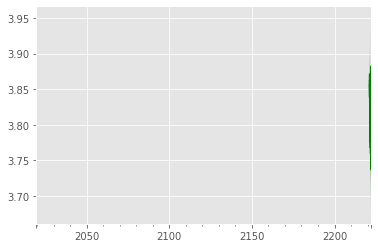

In [103]:
for test_entry, forecast in zip(testing_data_heuristics, predictor.predict(testing_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])

In [25]:

start_date = train_data.index[-1]
df = pd.DataFrame()

date= start_date

for i in range(len(temp.iloc[int(train_ratio*len(temp))+pred_len:])):
    #Compare yesterdays prediction with today's close price

    data_temp = temp.iloc[i:int(train_ratio*len(temp))+pred_len+i]
    currentPrice = data_temp[target_asset].iloc[-1]
    print(currentPrice)

    #If yesterdays predicion in the df, compare the prediction with the current close price
    if date-pd.Timedelta(1,'D') in df.index:
        yesterdayDate = date-pd.Timedelta(1,'D') 
        if currentPrice <= df.loc[(yesterdayDate, 'lowerQ')]:
            print('S')
            df.loc[(date, 'signal') ] =  'BUY'
        elif currentPrice >= df.loc[(yesterdayDate, 'upperQ')]:
            print('B')
            df.loc[(date, 'signal') ] =  'SHORT'
        else:
            print('N')
            df.loc[(date, 'signal') ] =  np.nan



    #Compute tomorrows prediction

    # Create testing datatset
    testing_data = ListDataset(
    [{"start": data_temp[target_asset].index[0],
      "target": data_temp[target_asset],
      'feat_dynamic_real': data_temp[feature_assets].values.T}],
    freq = "1d"
    )

    prediction = []
    for test_entry, forecast in zip(testing_data, predictor.predict(testing_data)):
#         to_pandas(test_entry)[-20:].plot()
#         forecast.plot()
#         plt.show()
        prediction.append(forecast.quantile(0.1)[0])
        prediction.append(forecast.mean[0])
        prediction.append(forecast.quantile(0.9)[0])

    df.loc[(date, 'price') ] =  currentPrice 
    df.loc[(date, 'lowerQ')] = prediction[0]
    df.loc[(date, 'mean')] = prediction[1]
    df.loc[(date, 'upperQ')] = prediction[2]

    date += pd.Timedelta(1,'D')

df['returns']=df['price'].pct_change()
df['returnsShift1'] = df['returns'].shift(-1)
df['long'] = 0
df['short'] = 0
df['long'][df['signal']=='BUY']=1
df['short'][df['signal']=='SHORT']=1
df['numUnits'] = df['long']-df['short']
df['marketValue'] = df['numUnits']*df['returnsShift1']
print(assets, np.cumsum(df['marketValue'].fillna(0))[-1])


3.17376864170312
3.0460318233064
N
2.9674245504468804
S
2.98707636866176
N
2.9674245504468804
N
3.06568364152128
B
3.07550955062872
B
3.0558577324138403
N
3.1442909143808
B
3.1246390961659203
B
3.1148131870584796
N
3.13446500527336
N
3.1835945508105605
B
3.15411682348824
N
3.1049872779510403
N
3.0853354597361604
N
3.0951613688436
N
3.1049872779510403
N
3.1148131870584796
N
3.13446500527336
B
3.13446500527336
B
3.13446500527336
B
3.1246390961659203
N
3.13446500527336
N
3.15411682348824
B
3.1934204599180003
B
3.1934204599180003
B
3.13446500527336
N
3.1246390961659203
N
3.15411682348824
N
3.0558577324138403
S
3.0460318233064
N
3.0165540959840795
N
3.0067281868766402
N
3.1049872779510403
B
3.1049872779510403
B
3.06568364152128
N
3.0853354597361604
N
2.9969022777692
N
3.0558577324138403
B
3.06568364152128
B
3.02638000509152
N
2.9674245504468804
N
2.9772504595543197
N
3.0067281868766402
B
3.03620591419896
B
2.98707636866176
N
3.0165540959840795
N
2.9772504595543197
N
2.9969022777692
N
2.9870

c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['TLS.AX', 'SNP200', 'SKC.AX'] -0.11351212446840053


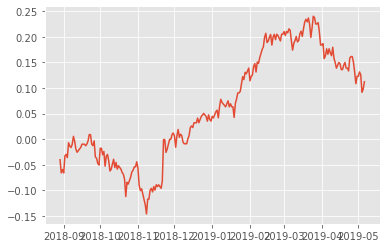

In [27]:
plt.plot(np.cumsum(df['returns']))

In [21]:
df

,price,lowerQ,mean,upperQ,signal,returns,returnsShift1,long,short,numUnits,marketValue
2018-08-28,3.090249,3.051408,3.108079,3.164948,NaN,NaN,0.027027,0,0,0,0.000000
2018-08-29,3.173769,3.037565,3.109374,3.178496,SHORT,0.027027,-0.065015,0,1,-1,0.065015
2018-08-30,2.967425,2.916796,2.982743,3.038007,BUY,-0.065015,0.000000,1,0,1,0.000000
2018-08-31,2.967425,2.870813,2.943077,3.013863,NaN,0.000000,0.036424,0,0,0,0.000000
2018-09-01,3.075510,2.950161,3.020987,3.095442,SHORT,0.036424,0.022364,0,1,-1,-0.022364
2018-09-02,3.144291,2.994171,3.052362,3.106326,SHORT,0.022364,-0.009375,0,1,-1,0.009375
2018-09-03,3.114813,2.990974,3.057799,3.134414,SHORT,-0.009375,0.022082,0,1,-1,-0.022082
2018-09-04,3.183595,3.025886,3.080606,3.151284,SHORT,0.022082,-0.024691,0,1,-1,0.024691
2018-09-05,3.104987,3.058342,3.138808,3.203051,NaN,-0.024691,-0.003165,0,0,0,-0.000000
2018-09-06,3.095161,3.029183,3.091281,3.140086,NaN,-0.003165,0.006349,0,0,0,0.000000


In [166]:
#FUCK THIS API BUT ALSO NOT REALLY ITS REALLY GOOD BUT FFS DOCUMENT THIS THIS BETTER

# target shape: (num_series, ts_length)
# feat_dynamic_real shape: (num_series, num_features, ts_length)
    
    
# The training data will have form (ts_length,), since its univariate
temp = data_close[['TLS.AX','SNP200']].dropna()
# temp = data_close[['TLS.AX','SKC.AX']].dropna()
target_asset = temp.columns[0]
feature_assets = temp.columns[1:]

# temp[feature_assets] = temp[feature_assets].pct_change()
temp = temp.dropna()
print(temp)
train_ratio = 0.88
pred_len = 2

train_data = temp.iloc[:int(train_ratio*len(temp))]
test_data = temp.iloc[: int((train_ratio)*len(temp))+pred_len]

# 'feat_dynamic_real'

#Create univariate dataset
training_data = ListDataset(
    [{"start": train_data[target_asset].index[0],
      "target": train_data[target_asset],
      'feat_dynamic_real': train_data[feature_assets].values.T}],
    freq = "1d"
)

# Create testing datatset
testing_data = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": train_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1d"
)

# Create testing datatset
testing_data_plots = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": test_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1d"
)



#Create the estimator and train
estimator = DeepAREstimator(freq="1d", prediction_length=pred_len, 
                            trainer=Trainer(epochs=50,learning_rate=10e-3),
                            use_feat_dynamic_real =True)

predictor = estimator.train(training_data=training_data)

              TLS.AX    SNP200
Date                          
2010-01-04  3.319005  0.009844
2010-01-05  3.309385 -0.000589
2010-01-06  3.251663 -0.004470
2010-01-07  3.193941  0.002592
2010-01-11  3.222802 -0.010342
2010-01-12  3.184321 -0.006409
2010-01-13  3.213182  0.006142
2010-01-14  3.222802  0.000327
2010-01-18  3.242043 -0.010161
2010-01-19  3.203562  0.001440
2010-01-20  3.222802 -0.008422
2010-01-21  3.270904 -0.015868
2010-01-27  3.299765  0.006179
2010-01-28  3.290145 -0.022190
2010-02-01  3.193941  0.017948
2010-02-02  3.251663  0.009250
2010-02-03  3.242043 -0.005658
2010-02-04  3.290145 -0.023260
2010-02-08  3.232423 -0.003605
2010-02-09  3.222802  0.001842
2010-02-10  3.261284  0.009062
2010-02-11  3.097738  0.001713
2010-02-15  3.020776  0.004906
2010-02-16  2.982295  0.021914
2010-02-17  2.982295 -0.002785
2010-02-18  3.011156 -0.004254
2010-02-22  2.895712  0.000170
2010-02-23  2.886092 -0.014793
2010-02-24  2.847610 -0.011703
2010-02-25  2.895712  0.009490
...     

INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.01
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.40it/s, avg_epoch_loss=0.537]
INFO:root:Epoch[0] Elapsed time 1.182 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.536934
INFO:root:Epoch[1] Learning rate is 0.01
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.38it/s, avg_epoch_loss=-.679]
INFO:root:Epoch[1] Elapsed time 1.184 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-0.678939
INFO:root:Epoch[2] Learning rate is 0.01
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.67it/s, avg_epoch_loss=-.971]
INFO:root:Epoch[2] Elapsed time 1.148 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.970768
INFO:root:Epoch[3] Learning rate is 0.01
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.46it/s, avg_epoch_

In [84]:
train_data[target_asset].shape

(1942,)

In [85]:
test_data[feature_assets].values.T.shape

(1, 1944)

In [161]:
train_data = temp.iloc[:int(train_ratio*len(temp))]
test_data = temp.iloc[(int((train_ratio)*len(temp))+pred_len):]

testing_data = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": test_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1d"
)

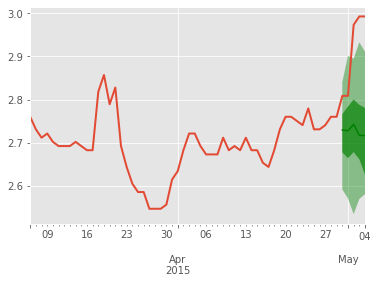

In [151]:
#Forecast
for test_entry, forecast in zip(testing_data_plots, predictor.predict(testing_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])

#Note that the dates are likely gonna be off. The test_entry plots daily from a given start date, instead of the normal weekly prices

In [169]:
from gluonts.evaluation import Evaluator
from gluonts.evaluation.backtest import make_evaluation_predictions

test_data = temp.iloc[:int(train_ratio*len(temp))+pred_len] 
start_date = train_data.index[-1]

df = pd.DataFrame()
date= start_date
RMSE = []
for i in range(len(temp.iloc[int(train_ratio*len(temp))+pred_len:])):
    data_temp = temp.iloc[i:int(train_ratio*len(temp))+pred_len+i]

    testing_data = ListDataset(
        [{"start": data_temp[target_asset].index[0],
          "target": data_temp[target_asset],
          'feat_dynamic_real': data_temp[feature_assets].values.T}],
        freq = "1d"
    )
    forecast_it, ts_it = make_evaluation_predictions(
        dataset= testing_data,  # test dataset
        predictor= predictor,  # predictor
        num_samples= 100,  # number of sample paths we want for evaluation
    )
    forecasts = list(forecast_it)
    tss = list(ts_it)
    evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
    agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(testing_data))
    RMSE.append(agg_metrics['RMSE'])
print(np.mean(RMSE))


Running evaluation: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 111.40it/s]


Running evaluation: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 143.24it/s]


0.04765976570451954


In [176]:
hyperparams = {}
hyperparams['epochs'] = [20,60,100,200,500,1000]
hyperparams['layers'] = [2,4,6]
hyperparams['num_cells'] = [20,40,100]
hyperparams['context_length'] = [2,4,6,8,10]

In [178]:
hyperparams.keys()

dict_keys(['epochs', 'layers', 'num_cells', 'context_length'])

In [174]:
[20,60,100,200,500,1000]

[7, 49, 343, 2401, 16807, 117649]

In [163]:
agg_metrics['RMSE']

0.07323559794982781

In [146]:
test_data = temp.iloc[:int(train_ratio*len(temp))+pred_len] 
start_date = train_data.index[-1]

df = pd.DataFrame()
date= start_date

for i in range(len(temp.iloc[int(train_ratio*len(temp))+pred_len:])):
    #Compare yesterdays prediction with today's close price
    
    data_temp = temp.iloc[i:int(train_ratio*len(temp))+pred_len+i]
    currentPrice = data_temp[target_asset].iloc[-1]
    
    #If yesterdays predicion in the df, compare the prediction with the current close price
    if date-pd.Timedelta(1,'D') in df.index:
        yesterdayDate = date-pd.Timedelta(1,'D') 
        if currentPrice <= df.loc[(yesterdayDate, 'lowerQ')]:
            df.loc[(date, 'signal') ] =  'BUY'
        elif currentPrice >= df.loc[(yesterdayDate, 'upperQ')]:
            df.loc[(date, 'signal') ] =  'SHORT'
        else:
            df.loc[(date, 'signal') ] =  np.nan
    
    
    
    #Compute tomorrows prediction

    # Create testing datatset
    testing_data = ListDataset(
        [{"start": data_temp[target_asset].index[0],
          "target": data_temp[target_asset].iloc[:-pred_len],
          'feat_dynamic_real': data_temp[feature_assets].values.T}],
        freq = "1d"
    )
    prediction = []
    for test_entry, forecast in zip(testing_data, predictor.predict(testing_data)):
#         to_pandas(test_entry)[-20:].plot()
#         forecast.plot()
#         plt.show()
        prediction.append(forecast.quantile(0.2)[0])
        prediction.append(forecast.mean[0])
        prediction.append(forecast.quantile(0.8)[0])
        
    df.loc[(date, 'price') ] =  currentPrice 
    df.loc[(date, 'lowerQ')] = prediction[0]
    df.loc[(date, 'mean')] = prediction[1]
    df.loc[(date, 'upperQ')] = prediction[2]
      
    date += pd.Timedelta(1,'D')
    
    
    
  

In [147]:
df['returns']=df['price'].pct_change()

In [148]:
df['returns']=df['price'].pct_change()
df['returnsShift1'] = df['returns'].shift(-1)
df['long'] = 0
df['short'] = 0
df['long'][df['signal']=='BUY']=1
df['short'][df['signal']=='SHORT']=1
df['numUnits'] = df['long']-df['short']
df['marketValue'] = df['numUnits']*df['returnsShift1']


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


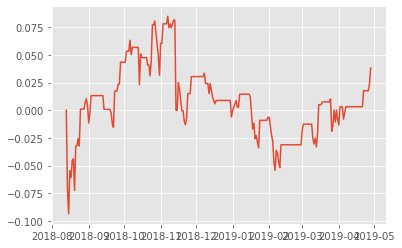

In [149]:
plt.plot(np.cumsum(df['marketValue']))

In [50]:
df

,price,lowerQ,mean,upperQ,signal,returns,returnsShift1,long,short
2018-05-10 02:00:00,3.109685,3.077702,3.122467,3.168359,NaN,NaN,-0.050000,0,0
2018-05-11 02:00:00,2.954201,3.019607,3.052762,3.086892,BUY,-0.050000,-0.055921,1,0
2018-05-12 02:00:00,2.788999,2.854873,2.885682,2.929694,BUY,-0.055921,-0.003484,1,0
2018-05-13 02:00:00,2.779281,2.762909,2.799554,2.832135,BUY,-0.003484,0.003497,1,0
2018-05-14 02:00:00,2.788999,2.763618,2.800965,2.842305,NaN,0.003497,-0.006969,0,0
2018-05-15 02:00:00,2.769563,2.747916,2.790326,2.836598,NaN,-0.006969,-0.017544,0,0
2018-05-16 02:00:00,2.720974,2.733409,2.768977,2.801993,BUY,-0.017544,-0.021429,1,0
2018-05-17 02:00:00,2.662668,2.693493,2.721950,2.751059,BUY,-0.021429,0.014599,1,0
2018-05-18 02:00:00,2.701539,2.677402,2.705948,2.740867,NaN,0.014599,0.003597,0,0
2018-05-19 02:00:00,2.711256,2.694200,2.726175,2.756060,NaN,0.003597,0.028674,0,0


In [331]:
forecasts = list(forecast_it)
tss = list(ts_it)
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(testing_data))


Running evaluation: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 111.43it/s]


In [332]:
agg_metrics

{'MSE': 0.003224199404940009,
 'abs_error': 0.10596871376037598,
 'abs_target_sum': 6.287394046783447,
 'abs_target_mean': 3.1436970233917236,
 'seasonal_error': 0.03717831440572265,
 'MASE': 1.4251414494475416,
 'sMAPE': 0.01672376855636553,
 'MSIS': 4.344551556353693,
 'QuantileLoss[0.1]': 0.012646675109863281,
 'Coverage[0.1]': 0.0,
 'QuantileLoss[0.5]': 0.10596871376037598,
 'Coverage[0.5]': 1.0,
 'QuantileLoss[0.9]': 0.05196256637573241,
 'Coverage[0.9]': 1.0,
 'RMSE': 0.05678203417402382,
 'NRMSE': 0.01806218403094134,
 'ND': 0.01685415499201744,
 'wQuantileLoss[0.1]': 0.002011433515342205,
 'wQuantileLoss[0.5]': 0.01685415499201744,
 'wQuantileLoss[0.9]': 0.008264563345177294,
 'mean_wQuantileLoss': 0.009043383950845647,
 'MAE_Coverage': 0.2333333333333333}

## DEEP S SAMPLE UNIVARIATE

In [4]:
from gluonts.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

pred_len = 3


#Read Data
data = pickle.load(open( "D:/PRISMO/historicalData/Data/asx200nobiasFINAL.pickle", "rb" ) )
data = pickle.load(open('D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle','rb'))
data_ = data.xs('OPEN',axis=1,level=1).dropna()
stocks = data_.columns
#Concatenate open and close prices
data_open = data.xs('OPEN',axis=1,level=1)
data_open.index = data_open.index+pd.Timedelta(10,'H')
data_close = data.xs('CLOSE',axis=1,level=1)
data_close.index = data_open.index+pd.Timedelta(16,'H')
openAndClose = pd.concat([data_open,data_close]).sort_index()
stocks = openAndClose.columns

# temp = data_close[['TLS.AX','SKC.AX','ABP.AX','SPK.AX']].dropna()
temp = data_close[['TLS.AX','SKC.AX']].dropna()
train_ratio = 0.9
test_ratio = 0.11

train_data = temp.iloc[:int(train_ratio*len(temp))]
test_data = temp.iloc[:int(train_ratio*len(temp))+pred_len]






In [5]:
#FUCK THIS API BUT ALSO NOT REALLY ITS REALLY GOOD BUT FFS DOCUMENT THIS THIS BETTER

# target shape: (num_series, ts_length)
# feat_dynamic_real shape: (num_series, num_features, ts_length)
    
    
# The training data will have form (ts_length,), since its univariate

target_asset = temp.columns[0]
feature_assets = temp.columns[1:]
# 'feat_dynamic_real'

#Create univariate dataset
training_data = ListDataset(
    [{"start": train_data[target_asset].index[0],
      "target": train_data[target_asset],
      'feat_dynamic_real': train_data[feature_assets].values.T}],
    freq = "1d"
)

# Create testing datatset
testing_data = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": train_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1d"
)

# Create testing datatset
testing_data_plots = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": test_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1d"
)



In [379]:
train_data[target_asset].shape

(2588,)

In [6]:
from gluonts.model.deepstate import DeepStateEstimator

#Create the estimator and train
estimator = DeepStateEstimator(freq="1d", prediction_length=pred_len,
                               use_feat_static_cat=False, 
                               use_feat_dynamic_real=True,
                               cardinality=[1],
                               trainer = Trainer(epochs=10))
#                                add_trend = True,
#                                num_periods_to_train = 30)

predictor = estimator.train(training_data=training_data)

INFO:root:Using CPU
INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  3.93it/s, avg_epoch_loss=-1.61]
INFO:root:Epoch[0] Elapsed time 12.736 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-1.608854
INFO:root:Epoch[1] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:11<00:00,  4.28it/s, avg_epoch_loss=-2.26]
INFO:root:Epoch[1] Elapsed time 11.684 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-2.260887
INFO:root:Epoch[2] Learning rate is 0.001
100%|█████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  3.89it/s, avg_epoch_loss=-2.3]
INFO:root:Epoch[2] Elapsed time 12.851 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-2.304268
INFO:root:Epoch[3] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:12<

In [324]:
test_data = temp.iloc[:int(train_ratio*len(temp))+pred_len]

,TLS.AX
Date,
2018-05-11 02:00:00,3.080532
2018-05-12 02:00:00,3.109685
2018-05-15 02:00:00,2.954201
2018-05-16 02:00:00,2.788999
2018-05-17 02:00:00,2.779281
2018-05-18 02:00:00,2.788999
2018-05-19 02:00:00,2.769563
2018-05-22 02:00:00,2.720974
2018-05-23 02:00:00,2.662668


In [370]:
temp.train_data.index[-1]

Timestamp('2018-08-21 02:00:00')

In [11]:
df = pd.DataFrame()


In [12]:
df.loc[(start_date, 'price')] = 1

In [13]:
df

,price
2018-09-24 02:00:00,1.0


In [15]:
test_data = temp.iloc[:int(train_ratio*len(temp))+pred_len] 
start_date = train_data.index[-1]

df = pd.DataFrame()
date= start_date
for i in range(len(temp.iloc[int(train_ratio*len(temp))+pred_len:])):
    #Compare yesterdays prediction with today's close price
    
    
    currentPrice = data_temp[target_asset].iloc[-1]
    
    
    
    #If yesterdays predicion in the df, compare the prediction with the current close price
    if date-pd.Timedelta(1,'D') in df.index:
        yesterdayDate = date-pd.Timedelta(1,'D') 
        if endOfDayPrice <= df.loc[(yesterdayDate, 'lowerQ')]:
            print('BUY')
        elif endOfDayPrice >= df.loc[(yesterdayDate, 'upperQ')]:
            print('SHORT')
        else:
            print('NO ACTION')
    
    
    
    #Compute tomorrows prediction
    data_temp = temp.iloc[i:int(train_ratio*len(temp))+pred_len+i]
    # Create testing datatset
    testing_data_temp = ListDataset(
        [{"start": data_temp.index[0],
          "target":  data_temp[target_asset].iloc[:-pred_len],
          'feat_dynamic_real':  data_temp[feature_assets].values.T}],
        freq = "1d"
    )
    
    

    
    
    prediction = []
    for test_entry, forecast in zip(testing_data_temp, predictor.predict(testing_data_temp)):
        prediction.append(forecast.quantile(0.1)[0])
        prediction.append(forecast.mean[0])
        prediction.append(forecast.quantile(0.9)[0])
        
    df.loc[(date, 'price') ] =  currentPrice 
    df.loc[(date, 'lowerQ')] = prediction[0]
    df.loc[(date, 'mean')] = prediction[1]
    df.loc[(date, 'upperQ')] = prediction[2]
      
    date += pd.Timedelta(1,'D')
    
    
    
  

SHORT
SHORT
NO ACTION
NO ACTION
BUY
BUY
NO ACTION
BUY
BUY
BUY
NO ACTION
NO ACTION
SHORT
SHORT
NO ACTION
SHORT
SHORT
SHORT
SHORT
SHORT
NO ACTION
BUY
BUY
NO ACTION
NO ACTION
NO ACTION
BUY
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
SHORT
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
NO ACTION
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
NO ACTION
NO ACTION
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
NO ACTION
NO ACTION
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
SHORT
NO ACTION
BUY
BUY
NO ACTION
BUY
BUY
BUY
BUY
BUY
NO ACTION
NO ACTION
NO ACTION
NO ACTION
SHORT
SHORT
SHORT
SHORT
NO A

In [16]:
df_res = df

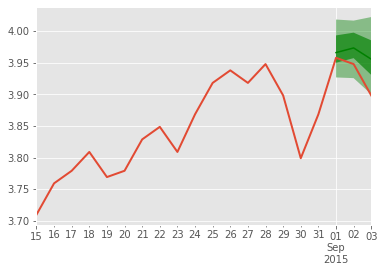

In [364]:

for test_entry, forecast in zip(testing_data_plots, predictor.predict(testing_data)):
    to_pandas(test_entry)[-20:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])


In [378]:
testing_data.shape

AttributeError: 'ListDataset' object has no attribute 'shape'

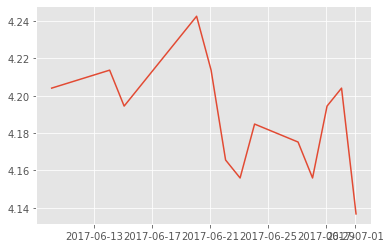

In [227]:
plt.plot(train_data[target_asset][-15:])

In [157]:
test_data[target_asset].values.T.shape

(2876,)

In [152]:
test_data[temp.columns[1:]].values.T.shape

(1, 2876)

In [147]:
test_data[target_asset].shape

(2876,)

In [148]:
test_data[temp.columns[1:]].values.T.shape

(1, 2876)

In [190]:
from gluonts.model.deepstate import DeepStateEstimator

#Create the estimator and train
estimator = DeepStateEstimator(freq="1d", prediction_length=5,
                               use_feat_static_cat=False, 
                               use_feat_dynamic_real=True,
                               cardinality=[1],
                               trainer = Trainer(epochs=10))

predictor = estimator.train(training_data=training_data)

INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  3.99it/s, avg_epoch_loss=-1.45]
INFO:root:Epoch[0] Elapsed time 12.520 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-1.453398
INFO:root:Epoch[1] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:14<00:00,  3.45it/s, avg_epoch_loss=-2.41]
INFO:root:Epoch[1] Elapsed time 14.485 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-2.406712
INFO:root:Epoch[2] Learning rate is 0.001
100%|█████████████████████████████████████████████████████████████| 50/50 [00:14<00:00,  3.55it/s, avg_epoch_loss=-2.6]
INFO:root:Epoch[2] Elapsed time 14.082 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-2.601767
INFO:root:Epoch[3] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.61it/s, av

In [192]:
#Forecast
for test_entry, forecast in zip(testing_data, predictor.predict(testing_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

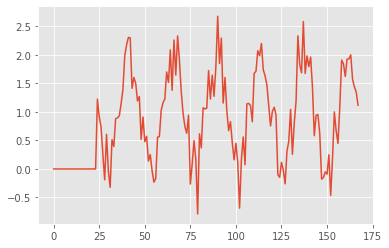

In [193]:
plt.plot(feat_dynamic_real[0])

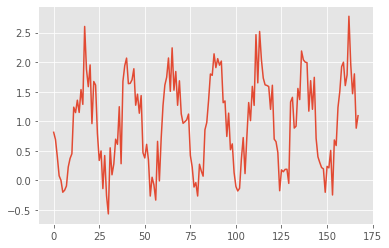

In [49]:
plt.plot(target[3])

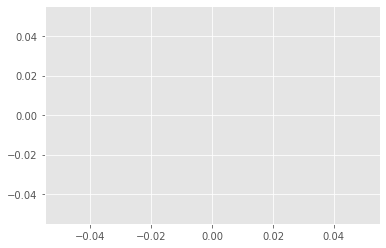

In [30]:
feat_static_cat.shape

(100,)

In [52]:
# Standard library imports
from functools import partial
from random import randint
from typing import List, Tuple

# Third-party imports
import numpy as np

# First-party imports
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
def make_dummy_datasets_with_features(
    num_ts: int = 5,
    start: str = "2018-01-01",
    freq: str = "D",
    min_length: int = 5,
    max_length: int = 10,
    prediction_length: int = 3,
    cardinality: List[int] = [],
    num_feat_dynamic_real: int = 0,
) -> Tuple[ListDataset, ListDataset]:

    data_iter_train = []
    data_iter_test = []

    for k in range(num_ts):
        ts_length = randint(min_length, max_length)
        data_entry_train = {
            FieldName.START: start,
            FieldName.TARGET: [0.0] * ts_length,
        }
        if len(cardinality) > 0:
            data_entry_train[FieldName.FEAT_STATIC_CAT] = [
                randint(0, c) for c in cardinality
            ]
        data_entry_test = data_entry_train.copy()
        if num_feat_dynamic_real > 0:
            data_entry_train[FieldName.FEAT_DYNAMIC_REAL] = [
                [float(1 + k)] * ts_length
                for k in range(num_feat_dynamic_real)
            ]
            data_entry_test[FieldName.FEAT_DYNAMIC_REAL] = [
                [float(1 + k)] * (ts_length + prediction_length)
                for k in range(num_feat_dynamic_real)
            ]
        data_iter_train.append(data_entry_train)
        data_iter_test.append(data_entry_test)

    return (
        ListDataset(data_iter=data_iter_train, freq=freq),
        ListDataset(data_iter=data_iter_test, freq=freq),
    )

In [60]:
a = make_dummy_datasets_with_features(num_feat_dynamic_real=3)[0]

In [64]:
next(iter(a))['target'].shape

(8,)

In [66]:
next(iter(a))['feat_dynamic_real'][0]

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 3.]], dtype=float32)

In [170]:
import pandas as pd
import numpy as np
from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

train_target = np.random.rand(48,168)
train_feat_dynamic_real = np.random.rand(48,168)
print(train_target.shape, train_feat_dynamic_real.shape)
start = pd.Timestamp("01-01-2019")

train_ds = ListDataset([{FieldName.TARGET: target,
                         FieldName.START: start,
                         FieldName.FEAT_DYNAMIC_REAL: fdr}
                        for (target, fdr) in zip(train_target, train_feat_dynamic_real)],
                      freq= '1H')

test_target = np.random.rand(2,168)
test_feat_dynamic_real = np.random.rand(2,168)


test_ds = ListDataset([{FieldName.TARGET: target,
                        FieldName.START: start,
                        FieldName.FEAT_DYNAMIC_REAL: fdr}
                        for (target, fdr) in zip(test_target, test_feat_dynamic_real)],
                      freq= '1H')

from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(freq='1H', 
                            prediction_length=24, 
                            context_length=48, 
                            use_feat_dynamic_real = True,
                            trainer=Trainer(epochs=5))

predictor = estimator.train(training_data=train_ds)

test_target = np.random.rand(2,168)
test_feat_dynamic_real = np.random.rand(2,168+24)

print(test_target.shape, test_feat_dynamic_real.shape)


test_ds = ListDataset([{FieldName.TARGET: target,
                        FieldName.START: start,
                        FieldName.FEAT_DYNAMIC_REAL: fdr}
                        for (target, fdr) in zip(test_target, test_feat_dynamic_real)],
                      freq= '1H')

pred = predictor.predict(test_ds)
pred = list(pred)

(48, 168) (48, 168)


INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.35it/s, avg_epoch_loss=0.479]
INFO:root:Epoch[0] Elapsed time 4.832 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.479049
INFO:root:Epoch[1] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.74it/s, avg_epoch_loss=0.282]
INFO:root:Epoch[1] Elapsed time 4.261 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.281996
INFO:root:Epoch[2] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.66it/s, avg_epoch_loss=0.246]
INFO:root:Epoch[2] Elapsed time 4.290 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.246250
INFO:root:Epoch[3] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.75it/s, avg_epoc

(2, 168) (2, 192)


In [162]:
pred 

[gluonts.model.forecast.SampleForecast(freq="1H", info=None, item_id=None, samples=numpy.array([[0.5910125374794006, 0.5702997446060181, 0.39326217770576477, 0.4829685688018799, 0.46314841508865356, 0.5474746823310852, 0.14482858777046204, 0.6761412024497986, 0.18877163529396057, 0.6835829615592957, 1.3238582611083984, 0.4213038980960846, 0.5723403096199036, 0.5315529704093933, 0.5789356827735901, 0.640975832939148, 0.5253276228904724, 0.8660536408424377, 0.7864563465118408, 0.5519200563430786, 0.3848918080329895, 0.5194728374481201, 0.30159974098205566, 0.7554381489753723], [0.9428951144218445, 0.23721373081207275, 0.12912943959236145, 1.3305608034133911, 0.5835960507392883, 0.6463102698326111, 0.5886467695236206, 0.5968624949455261, 0.3453599512577057, 0.12839001417160034, 0.62160325050354, 0.14676764607429504, 0.7850998640060425, 0.5986089110374451, 0.21668343245983124, 1.251105546951294, 0.12206846475601196, 0.6861423254013062, 0.8737097978591919, 1.0319448709487915, 0.740227043628

In [48]:
pickle.load(open('C:/Users/Billy/Documents/PRISMO/Backtester/optimizers/deepAR/results/trial_100_2_20_6.pickle','rb'))

[[100, 2, 20, 2, 0.056061296461320714], [100, 2, 20, 6, 0.07006643050800912]]

In [47]:
datetime.datetime.now()

datetime.datetime(2020, 1, 31, 16, 24, 55, 801979)

In [2]:
hf_data = pickle.load(open('E:/allOrdsnobias3.pickle','rb'))

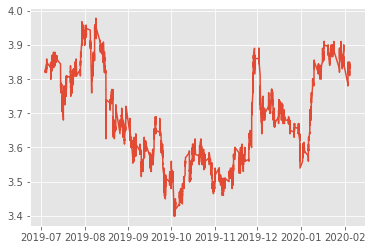

In [7]:
plt.plot(hf_data['TLS.AX'].CLOSE.dropna())

In [6]:
hf_data['TLS.AX'].CLOSE.dropna()

Date
2019-07-04 05:52:00    3.824079
2019-07-04 05:53:00    3.824079
2019-07-04 05:54:00    3.829039
2019-07-04 05:55:00    3.824079
2019-07-04 05:56:00    3.829039
2019-07-04 05:57:00    3.829039
2019-07-04 05:58:00    3.824079
2019-07-04 05:59:00    3.824079
2019-07-04 06:00:00    3.819119
2019-07-04 06:11:00    3.829039
2019-07-05 00:10:00    3.833999
2019-07-05 00:11:00    3.838959
2019-07-05 00:12:00    3.833999
2019-07-05 00:13:00    3.833999
2019-07-05 00:14:00    3.833999
2019-07-05 00:15:00    3.833999
2019-07-05 00:16:00    3.829039
2019-07-05 00:17:00    3.824079
2019-07-05 00:18:00    3.824079
2019-07-05 00:19:00    3.824079
2019-07-05 00:20:00    3.824079
2019-07-05 00:21:00    3.824079
2019-07-05 00:22:00    3.819119
2019-07-05 00:23:00    3.824079
2019-07-05 00:24:00    3.829039
2019-07-05 00:25:00    3.824079
2019-07-05 00:26:00    3.824079
2019-07-05 00:27:00    3.824079
2019-07-05 00:28:00    3.829039
2019-07-05 00:29:00    3.829039
                         ...   
202